In [3]:
import numpy as np
from keras.models import Sequential
from keras.src.layers import Dense
from keras.src.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.src.layers.convolutional import Conv1D
from keras.src.layers.convolutional import Conv2D
from keras.src.layers.convolutional import MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
seed=10
np.random.seed(seed)
(X_train,y_train), (X_test, y_test)= mnist.load_data()

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [6]:
X_predicts = X_test

In [7]:
X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_val=X_val.reshape(X_val.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [8]:
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_val= np_utils.to_categorical(y_val)
num_classes=y_train.shape[1]
print(num_classes)

10


In [9]:
def cnn_model():
    model=Sequential()
    # 32 filter and 5x5
    model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
    # Maxpooling 2x2
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    # Drop layer 20%
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model=cnn_model()
model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10, batch_size=200, verbose=2)
score= model.evaluate(X_val, y_val, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/10
240/240 - 4s - loss: 0.8561 - accuracy: 0.7400 - val_loss: 0.3389 - val_accuracy: 0.9001 - 4s/epoch - 18ms/step
Epoch 2/10
240/240 - 3s - loss: 0.3673 - accuracy: 0.8860 - val_loss: 0.2377 - val_accuracy: 0.9289 - 3s/epoch - 14ms/step
Epoch 3/10
240/240 - 3s - loss: 0.2968 - accuracy: 0.9081 - val_loss: 0.2031 - val_accuracy: 0.9367 - 3s/epoch - 12ms/step
Epoch 4/10
240/240 - 3s - loss: 0.2597 - accuracy: 0.9203 - val_loss: 0.1772 - val_accuracy: 0.9448 - 3s/epoch - 12ms/step
Epoch 5/10
240/240 - 3s - loss: 0.2341 - accuracy: 0.9277 - val_loss: 0.1606 - val_accuracy: 0.9516 - 3s/epoch - 10ms/step
Epoch 6/10
240/240 - 3s - loss: 0.2166 - accuracy: 0.9323 - val_loss: 0.1514 - val_accuracy: 0.9522 - 3s/epoch - 10ms/step
Epoch 7/10
240/240 - 3s - loss: 0.2033 - accuracy: 0.9367 - val_loss: 0.1376 - val_accuracy: 0.9579 - 3s/epoch - 11ms/step
Epoch 8/10
240/240 - 3s - loss: 0.1944 - accuracy: 0.9397 - val_loss: 0.1373 - val_accuracy: 0.9561 - 3s/epoch - 13ms/step
Epoch 9/10
240/2

1/1 [==============================] - 0s 197ms/step
Du Doan So Trong Hinh La: [8]


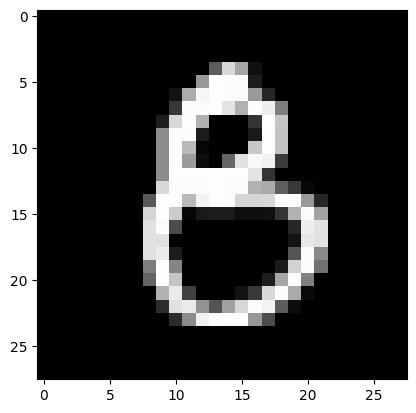

In [11]:
index = 800
image = X_test[index]
image_show = X_predicts[index]
image = np.expand_dims(image, axis=0)
predicts = model.predict(image)
predicted_class = np.argmax(predicts, axis=1)
print("Du Doan So Trong Hinh La: "+ str(predicted_class))
plt.subplot()
plt.imshow(image_show, cmap=plt.get_cmap('gray'))